<a href="https://colab.research.google.com/github/mohammadAliMkh/Pytorch/blob/main/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision import models
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [2]:
mnist_train = datasets.FashionMNIST(root = "Data" , train = True ,download = True , transform = ToTensor() , target_transform = None)
mnist_test = datasets.FashionMNIST(root = "Data" , train = False ,download = True , transform = ToTensor() , target_transform = None)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to Data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to Data/FashionMNIST/raw



In [3]:
len(mnist_train) , len(mnist_test)

(60000, 10000)

In [4]:
class_labels = mnist_train.classes

In [5]:
mnist_train.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

(-0.5, 27.5, 27.5, -0.5)

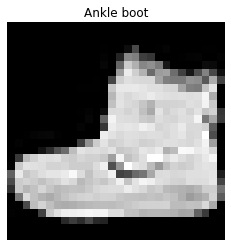

In [6]:
plt.imshow(mnist_train.data[0] , cmap = "gray")
plt.title(class_labels[mnist_train.targets[0]])
plt.axis(False)

In [7]:
def plot_random_images(number_of_images = 16 , data = mnist_train):
  ''' plot random images of selected datasets with their labels
  '''
  plt.figure(figsize = (12 , 8))
  for i in range(1 , number_of_images + 1):
    plt.subplot(4 , 4 , i)
    rand = torch.randint(0, len(mnist_train), size =[1]).item()
    img , label = mnist_train[rand]
    plt.imshow(torch.squeeze(img), cmap = "gray")
    plt.title(class_labels[label])
    plt.axis(False)

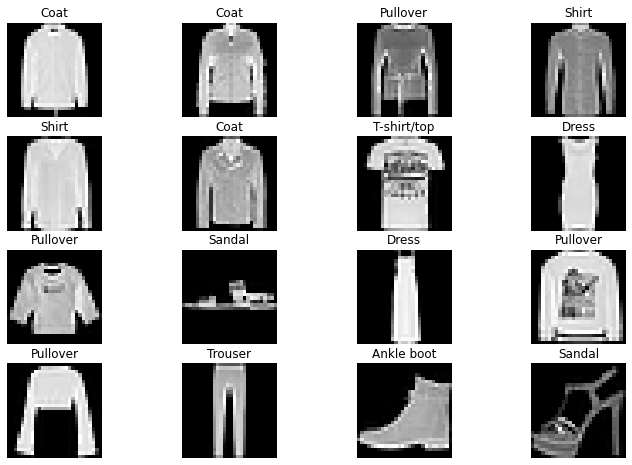

In [8]:
plot_random_images()

In [9]:
train_dataLoader = DataLoader(dataset = mnist_train , batch_size = 32 , shuffle = True)
train_dataLoader

In [10]:
test_dataLoader = DataLoader(dataset = mnist_test , batch_size = 32 , shuffle = False)
test_dataLoader

In [11]:
def plot_first_batch(dataLoader, batch_size = 32):
  img , label = next(iter(dataLoader))
  plt.figure(figsize = (20 ,14))
  for i in range( len(img)):
    plt.subplot(4,8 , i+1)
    plt.imshow(img[i].squeeze() , cmap = "gray")
    plt.title(class_labels[label[i]])
    plt.axis(False)

In [14]:
class FashionMnistModel0(torch.nn.Module):
  def __init__(self , input_layer:int , hidden_layer:int , output_layer:int):
    super().__init__()
    self.layerStacks = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(in_features = input_layer , out_features = hidden_layer),
        torch.nn.Linear(in_features = hidden_layer , out_features = output_layer)
    )
  
  def forward(self , x:torch.Tensor) -> torch.Tensor:
    return self.layerStacks(x)

In [29]:
model0 = FashionMnistModel0(input_layer = 28 * 28 , hidden_layer = 128 , output_layer = len(class_labels))

In [30]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model0.parameters() , lr = 0.01)

In [37]:
from tqdm.auto import tqdm
import timeit

In [51]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

(1722.327080267, 1722.327298125)

In [65]:
def calclulate_timer(start_time , end_time , device = device):
  ''' this method's been created for calculating process time on the selcted device
  args:
     start_time: timeit.Timer().timer() before operation
     end_time: timeit.Timer().timer() after operation
  output:
     print end_time - start_time 
  '''
  start = start_time
  end = end_time
  time = end - start
  print(f"process time on the {device} is\t{time:0.3f}")